In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [17]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Making the data ready for training

In [38]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


Our NN will have a simple two-layer architecture. 
* Input layer  a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. 
* A hidden layer  a[1] will have 10 units with ReLU activation.
* finally our output layer  a[2] will have 10 units corresponding to the ten digit classes with softmax activation.



In [39]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [40]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = frd_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [41]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 2 5 5] [0 8 9 ... 4 0 6]
0.086
Iteration:  10
[0 5 1 ... 9 5 5] [0 8 9 ... 4 0 6]
0.12097560975609756
Iteration:  20
[0 5 6 ... 9 5 0] [0 8 9 ... 4 0 6]
0.18736585365853659
Iteration:  30
[0 3 6 ... 9 0 0] [0 8 9 ... 4 0 6]
0.27070731707317075
Iteration:  40
[0 3 1 ... 2 0 0] [0 8 9 ... 4 0 6]
0.35804878048780486
Iteration:  50
[0 3 1 ... 9 0 0] [0 8 9 ... 4 0 6]
0.41121951219512193
Iteration:  60
[0 3 3 ... 9 0 0] [0 8 9 ... 4 0 6]
0.45458536585365855
Iteration:  70
[0 3 3 ... 9 0 0] [0 8 9 ... 4 0 6]
0.49173170731707316
Iteration:  80
[0 3 3 ... 9 0 0] [0 8 9 ... 4 0 6]
0.5234634146341464
Iteration:  90
[0 3 8 ... 9 0 0] [0 8 9 ... 4 0 6]
0.5529024390243903
Iteration:  100
[0 3 8 ... 9 0 0] [0 8 9 ... 4 0 6]
0.5783658536585365
Iteration:  110
[0 3 8 ... 9 0 0] [0 8 9 ... 4 0 6]
0.6004878048780488
Iteration:  120
[0 3 8 ... 9 0 0] [0 8 9 ... 4 0 6]
0.6205365853658537
Iteration:  130
[0 3 8 ... 9 0 0] [0 8 9 ... 4 0 6]
0.6380487804878049
Iteration:  140
[0 3 8 

In [47]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


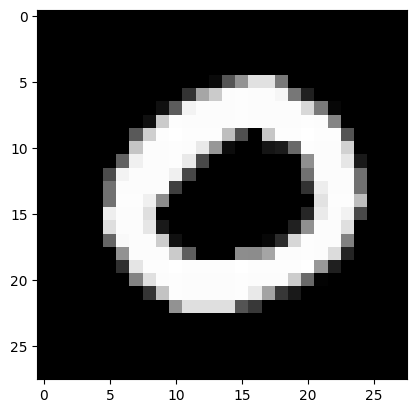

Prediction:  [8]
Label:  8


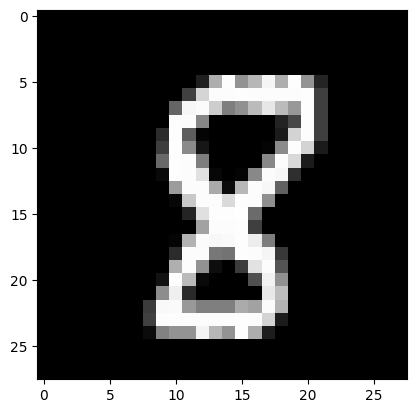

Prediction:  [9]
Label:  9


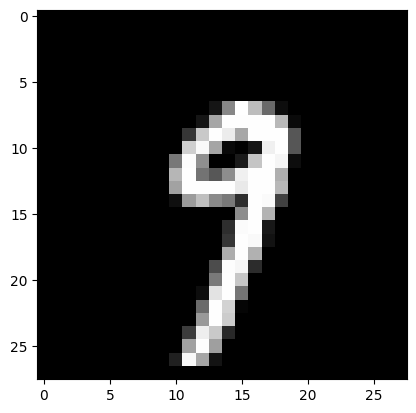

Prediction:  [9]
Label:  9


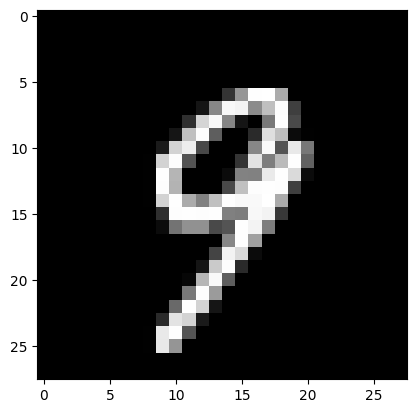

In [48]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [49]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 1 2 9 6 9 3 9 8 9 0 8 8 3 0 4 4 8 1 8 9 4 3 7 3 1 7 2 9 7 0 5 0 1 3 6 9
 3 5 4 4 0 8 6 6 5 2 6 4 4 2 2 9 2 5 2 9 9 9 7 4 9 2 9 1 0 1 5 2 1 4 1 4 9
 6 9 1 2 2 0 9 8 2 7 2 4 8 8 6 7 8 9 3 2 3 9 2 3 2 7 0 5 8 1 7 2 4 3 4 3 6
 3 3 8 9 2 5 2 8 8 8 5 8 8 0 4 6 7 3 3 7 1 9 3 0 3 4 6 7 4 4 6 9 0 2 5 0 0
 2 1 7 5 0 6 4 4 2 5 5 2 1 6 2 1 7 9 4 9 1 0 6 9 4 5 8 7 9 5 7 7 6 6 9 2 3
 6 2 9 8 9 6 6 1 6 6 0 6 3 6 8 9 9 3 1 4 6 7 2 0 4 9 9 9 5 1 1 3 1 8 4 0 8
 5 3 7 8 0 8 9 9 8 2 5 3 0 6 0 9 9 9 8 3 5 8 4 6 1 1 0 2 3 2 6 6 0 6 1 5 6
 1 1 5 0 3 8 8 7 6 8 4 9 3 4 1 7 8 2 3 5 8 8 4 3 9 2 2 3 8 6 0 0 1 1 2 8 9
 4 4 0 8 0 0 0 1 6 6 4 7 0 8 8 0 6 6 1 9 2 1 5 5 2 1 5 7 4 3 5 2 1 6 1 9 9
 4 3 5 5 5 9 1 5 1 8 8 7 8 1 1 7 5 2 1 8 9 7 0 0 0 9 6 4 1 9 8 9 9 3 3 2 7
 5 8 5 0 6 3 5 8 7 3 1 4 6 4 8 6 5 9 6 9 3 8 3 7 9 0 8 2 9 0 2 9 2 9 7 1 6
 9 2 3 8 0 5 3 8 1 9 5 4 5 2 2 3 3 3 5 9 3 7 4 1 6 2 0 2 8 1 9 1 0 1 7 9 2
 7 9 1 8 3 9 0 7 6 1 2 1 1 4 1 1 5 1 6 9 1 7 4 4 1 2 1 0 8 0 9 6 0 7 9 9 9
 9 1 0 0 9 6 4 2 6 9 2 3 

0.819

 81.9% accuracy, so our model generalized from the training data pretty well.